In [172]:
!pip install rasterio

# Inventario


In [173]:
#Libreria
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(19705,)

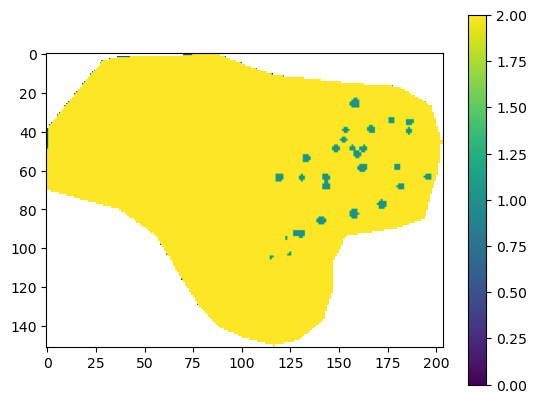

In [197]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk * inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [175]:
np.unique(inventario)#para conocer los numeros almacenados en el raster
     

array([ 0.,  1.,  2., nan])

# Método Bivariado

In [176]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica
     

(19705,)

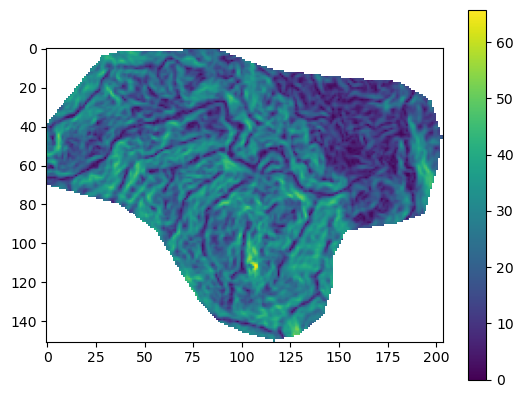

In [177]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape
     

In [178]:
print(type(pendiente_vector_MenM))
print(pendiente_vector_MenM)
     

<class 'numpy.ndarray'>
[20.83282  21.867115 20.780851 ...  7.455642 32.32441  26.939585]


In [179]:
#Conteo de celdas para Pendiente
pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=fp=0
for row in pendiente_serie:
        if (0 <= row) & (row < 5):
          ap+=1
        elif (5 <= row) & (row < 10):
          bp+=1
        elif (10 <= row) & (row < 15):
          cp+=1
        elif (15 <= row) & (row < 30):
          dp+=1
        elif (30 <= row) & (row < 47):
          ep+=1
        if (row>=47):
          fp+=1

totalp=ap+bp+cp+dp+ep
print("total:", totalp,ap,bp,cp,dp,ep,fp)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=fp1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 5):
          ap1+=1
        elif (5 <= row) & (row < 10):
          bp1+=1
        elif (10 <= row) & (row < 15):
          cp1+=1
        elif (15 <= row) & (row < 30):
          dp1+=1
        elif (30 <= row) & (row < 90):
          ep1+=1
        if (row>=90):
          fp1+=1

total1p=ap1+bp1+cp1+dp1+ep1+fp1
print("total1:", total1p,ap1,bp1,cp1,dp1,ep1,fp1)

total: 19638 655 1711 2502 9751 5019 67
total1: 19652 185 527 735 3525 14541 139


In [180]:
dtp=total1p/totalp
print(dtp)

1.0007129035543334


In [181]:
w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
w_e=(ep1/total1p)/(ep/totalp)
w_f=(fp1/total1p)/(fp/totalp)
print("w:", w_a,w_b,w_c,w_d,w_e)


w: 0.28224153709662636 0.3077875905751306 0.2935557110997544 0.3612438524469968 2.895126729297791


[0.28224152 0.2935557  0.3077876  0.36124384 2.8951268         nan]


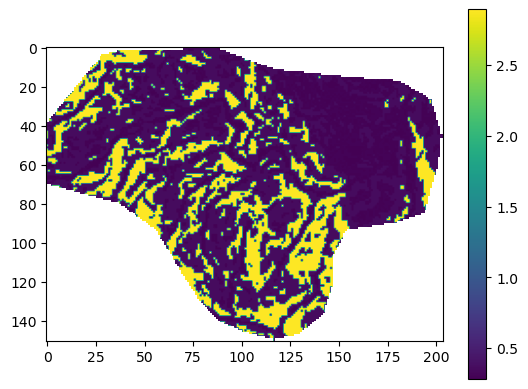

In [182]:
pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),w_a,pendiente )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=5, pendiente_c<10 )),w_b,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=10, pendiente_c<15 )),w_c,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=15, pendiente_c<30 )),w_d,pendiente_c )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=30, pendiente_c<90 )),w_e,pendiente_c )
pendiente_c=np.where ( pendiente_c>=90,w_f,pendiente_c )
plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));     

(19705,)

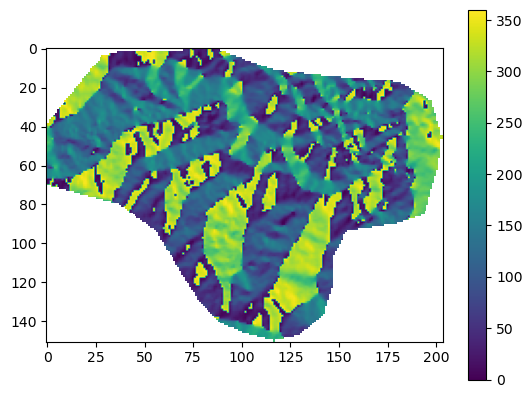

In [183]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [184]:
aspecto_serie=pd.Series(aspecto_vector_MenM)
aa=ba=ca=da=ea=0
for row in aspecto_serie:
        if (0 <= row) & (row < 75):
          aa+=1
        elif (75 <= row) & (row < 180):
          ba+=1
        elif (180 <= row) & (row < 275):
          ca+=1
        elif (275 <= row) & (row < 300):
          da+=1
        if (row>=300):
          ea+=1

totala=aa+ba+ca+da+ea
print("total:", totala,aa,ba,ca,da,ea)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=ea1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 75):
          aa1+=1
        elif (75 <= row) & (row < 180):
          ba1+=1
        elif (180 <= row) & (row < 275):
          ca1+=1
        elif (275 >= row) & (row < 300):
          da1+=1
        if (row>=300):
          ea1+=1

total1a=aa1+ba1+ca1+da1+ea1
print("total1:", total1a,aa1,ba1,ca1,da1,ea1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
w_e=(ea1/total1a)/(ea/totala)
print("w:", w_a,w_b,w_c,w_d,w_e)


total: 19705 5330 6933 2312 1087 4043
total1: 18796 2427 4025 3413 92 8839
w: 0.4773682936012492 0.6086332681025302 1.5476026381597792 0.08872975576827108 2.2919777401446897


[0.08872975 0.4773683  0.6086333  1.5476027  2.2919776         nan]


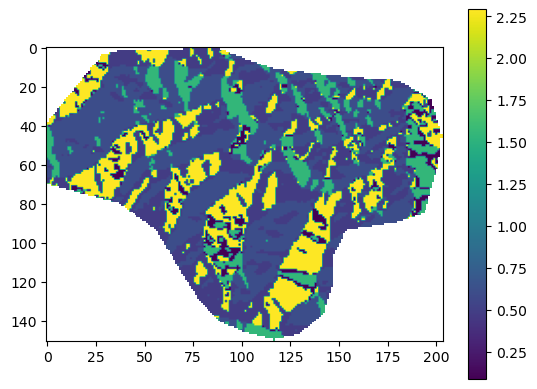

In [185]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<75 )),w_a,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=75, aspecto_re<180 )),w_b,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=180, aspecto_re<275 )),w_c,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=275, aspecto_re<300 )),w_d,aspecto_re);
aspecto_re=np.where ( aspecto_re>=300,w_e,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();
     

(19705,)

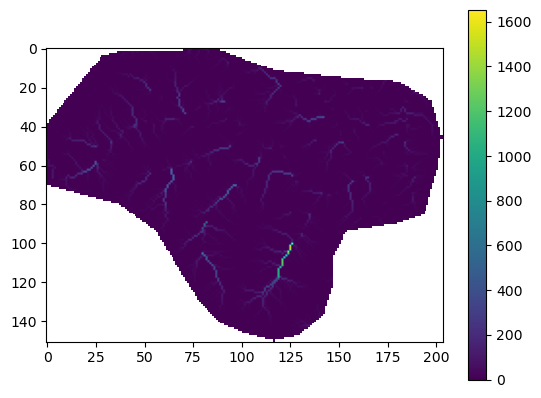

In [186]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/FlowAcc_final1.tif?raw=true')
flow_acc=raster.read(1)
flow_acc=np.where(flow_acc<-100,np.nan,flow_acc)
flow_acc_vector=flow_acc.ravel()
flow_acc_vector_MenM=flow_acc_vector[~np.isnan(flow_acc_vector)]
plt.imshow(flow_acc)
plt.colorbar()
flow_acc_vector_MenM.shape

In [187]:
flow_acc_serie=pd.Series(flow_acc_vector_MenM)
af=bf=cf=df=ef=0
for row in flow_acc_serie:
        if (0 <= row) & (row <2.5):
          af+=1
        elif (2.5<= row) & (row < 5):
          bf+=1
        elif (5<= row) & (row < 15):
          cf+=1
        elif (15 <= row) & (row <30):
          df+=1
        if (row>=30):
          ef+=1

totalf=af+bf+cf+df+ef
print("total:", totalf,af,bf,cf,df,ef)

flow_accconMenM=flow_acc_vector_MenM*inventario_vector_MenM
af1=bf1=cf1=df1=ef1=0
for row in flow_accconMenM:
        if (0 < row) & (row <2.5):
          af1+=1
        elif (2.5 <= row) & (row < 5):
          bf1+=1
        elif (5 <= row) & (row < 15):
          cf1+=1
        elif (15 >= row) & (row < 30):
          df1+=1
        if (row>=30):
          ef1+=1

total1f=af1+bf1+cf1+df1+ef1
print("total1:", total1f,af1,bf1,cf1,df1,ef1)

w_a=(af1/total1f)/(af/totalf)
w_b=(bf1/total1f)/(bf/totalf)
w_c=(cf1/total1f)/(cf/totalf)
w_d=(df1/total1f)/(df/totalf)
w_e=(ef1/total1f)/(ef/totalf)
print("w:", w_a,w_b,w_c,w_d,w_e)

total: 19705 11816 2249 3268 1030 1342
total1: 18137 3418 1996 3912 6476 2335
w: 0.31427697354547685 0.964233170915707 1.3005521891756937 6.830942058582172 1.8903636398147663


[0.31427696 0.96423316 1.3005521  1.8903637  6.830942          nan]


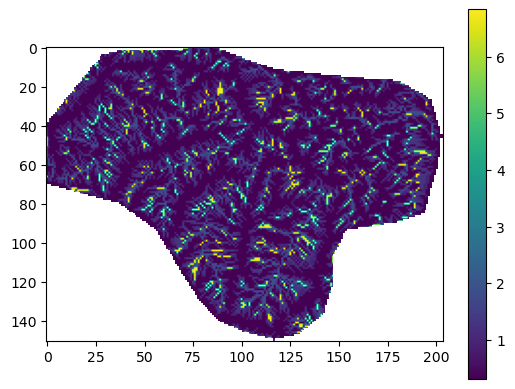

In [188]:
flow_acc_re=np.where ( (np.logical_and (flow_acc>=0,flow_acc<2.5 )),w_a,flow_acc );
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=2.5, flow_acc_re<5 )),w_b,flow_acc_re);
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=5, flow_acc_re<15 )),w_c,flow_acc_re);
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=15, flow_acc_re<30 )),w_d,flow_acc_re);
flow_acc_re=np.where ( flow_acc_re>=30,w_e,flow_acc_re);
print(np.unique(flow_acc_re));
plt.imshow(flow_acc_re);
plt.colorbar();

(19705,)

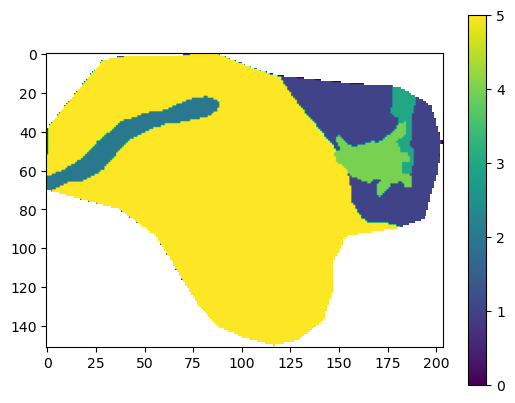

In [189]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Geolo_final1.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia>=10,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [190]:

np.unique(geologia)

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

In [191]:
ag=(geologia == 0).sum()
bg=(geologia == 1).sum()
cg=(geologia == 2).sum()
dg=(geologia == 3).sum()
eg=(geologia == 4).sum()
fg=(geologia == 5).sum()


totalg=ag+bg+cg+dg+eg+fg
print("total", totalg,ag,bg,cg,dg,eg,fg)

geologiaconMenM=geologia*inventario
ag1=(geologiaconMenM == 0).sum()
bg1=(geologiaconMenM == 1).sum()
cg1=(geologiaconMenM == 2).sum()
dg1=(geologiaconMenM == 3).sum()
eg1=(geologiaconMenM == 4).sum()
fg1=(geologiaconMenM == 5).sum()



totalg1=ag1+bg1+cg1+dg1+eg1+fg1
print("total1", totalg1,ag1,bg1,cg1,dg1,eg1,fg1)

w_a=(ag1/totalg1)/(ag/totalg)
w_b=(bg1/totalg1)/(bg/totalg)
w_c=(cg1/totalg1)/(cg/totalg)
w_d=(dg1/totalg1)/(dg/totalg)
w_e=(eg1/totalg1)/(eg/totalg)
w_f=(fg1/totalg1)/(fg/totalg)

print("w:", w_a,w_b,w_c,w_d,w_e,w_f)

total 19705 100 2749 929 307 770 14850
total1 3994 108 101 2647 17 990 131
w: 5.328342513770656 0.18126544126848693 14.057451893663963 0.27319888627729866 6.343264897346018 0.043522438539964826


[ 0.04352244  0.18126544  0.27319889  5.32834251  6.3432649  14.05745189
         nan]


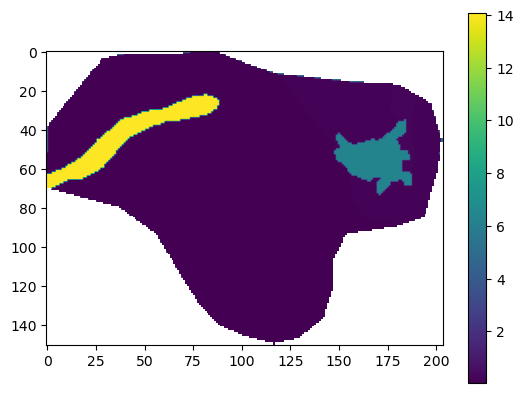

In [192]:
geologia_re=np.where(geologia<=0,w_a,geologia)
geologia_re=np.where(geologia_re==1,w_b,geologia_re)
geologia_re=np.where(geologia_re==2,w_c,geologia_re)
geologia_re=np.where(geologia_re==3,w_d,geologia_re)
geologia_re=np.where(geologia_re==4,w_e,geologia_re)
geologia_re=np.where(geologia_re==5,w_f,geologia_re)

print(np.unique(geologia_re))
plt.imshow(geologia_re);
plt.colorbar();
     

In [193]:
w_0=0.5359552431754474
w_1=0.2369598926001358
w_2=0.09868508640549987
w_3=0.04810911593912178

print("w:", w_0,w_1,w_2,w_3)

w: 0.5359552431754474 0.2369598926001358 0.09868508640549987 0.04810911593912178


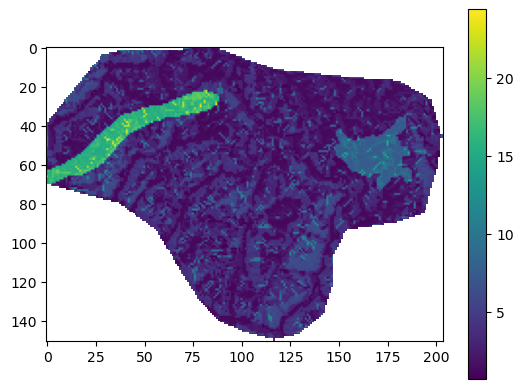

In [194]:
IS=pendiente_c+aspecto_re+flow_acc_re+geologia_re
plt.imshow(IS);
plt.colorbar();

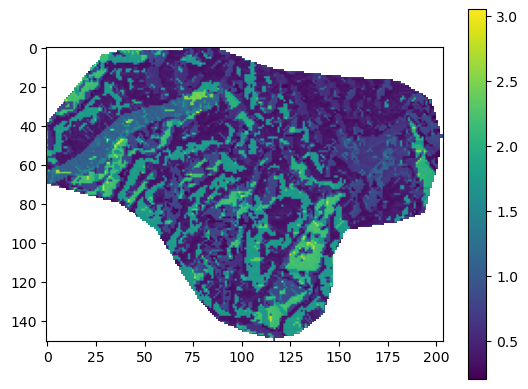

In [195]:
IS=(0.54*pendiente_c)+(0.24*aspecto_re)+(0.098*flow_acc_re)+(0.048*geologia_re)
plt.imshow(IS);
plt.colorbar();